<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/05.1-Beta-Binomial-Conjugate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beta - Binomial Conjugate
We can combine a beta prior and binomial distribution together to get a posterior distribution.  
The beta distribution is given by $$Beta (p;α,β) = \frac{p^{α-1} * (1-p)^{β-1}}{beta(α,β)}$$

Similarly the binomial distribution is given as $$B(k;n,p) =\binom{n}{k} *p^k *(1-p)^{n-k} $$

> Remember that a binomial distribution is used to calculate the probability of k successful outcomes, given n number of trials with the probability of the successful outcome being p

## How would we calculate the posterior using this conjugate prior?
* Let's say we have a beta prior of the number of successes and failures for an event Beta(α,β)
* We then observe k successes in n independent trials, this likelihood function, is a binomial distribution proportional to $p^k *(1-p)^{n-k}$
* Using the conjugate prior, the posterior distribution can be explained as a Beta distribution with updated parameters:
    * $α_{pos}= α + k$
    * $β_{pos}= β+n-k$
* Putting it together the **posterior beta distribution** has parameters
$$B(p∣k,n)∼ Beta(α + k , β+n-k)$$

**Thus, we can find the posterior distribution without needing to calculate the denominator of the bayes theorem.**

This can also be written in beta terms as  
$$Beta(α_{pos},β_{pos})= Beta(α_{prior}+α_{likelihood} ,β_{prior} + β_{likelihood} )$$

where,   
$α_{likelihood} = k$ (number of successes)  
$β_{likelihood} = n-k$ (number of failures in n trials)

## Will Ronaldo score from the penalty spot?
You are a sports analyst trying to find the probability that Cristiano Ronaldo scores a penalty.   
Looking at his previous stats he’s scored 175 out of 208 penalties (84%). You take that as the prior **Beta(175,33)**. You then watch his current season and see in his last 20 kicks, he’s scored 18 times. This data follows a **binomial distribution** with **k = 18 and n=20**.   
We can then combine the two to get a posterior distribution of:   
$α_{pos}= α + k = 175+18=193$   
$β_{pos} =β +n-k=33+20-18=35$  
$= Beta(193, 35)$   



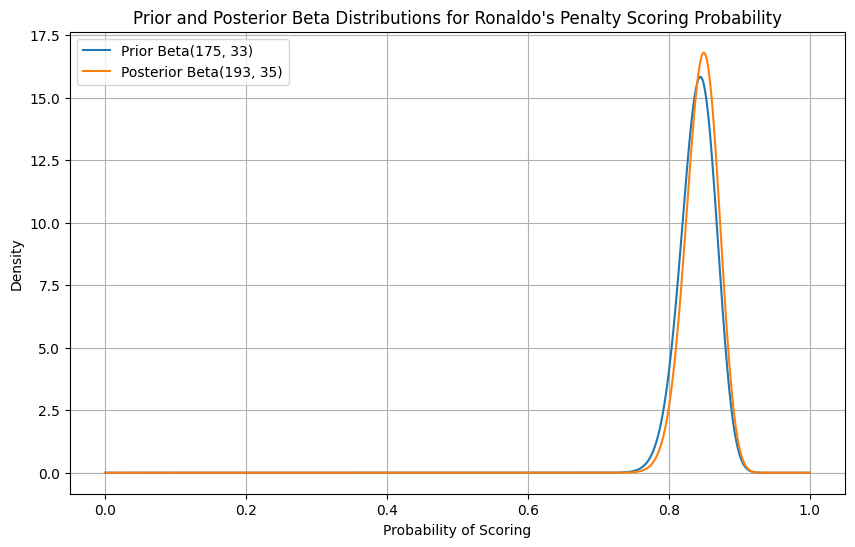

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the prior and posterior beta distributions
alpha_prior = 175
beta_prior = 33

alpha_posterior = 193
beta_posterior = 35

# Generate x values (probabilities) from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) for the prior and posterior distributions
pdf_prior = beta.pdf(x, alpha_prior, beta_prior)
pdf_posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_prior, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='#1f77b4')
plt.plot(x, pdf_posterior, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})', color='#ff7f0e')

# Add labels and title
plt.xlabel('Probability of Scoring')
plt.ylabel('Density')
plt.title('Prior and Posterior Beta Distributions for Ronaldo\'s Penalty Scoring Probability')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

This is our new updated belief about Ronaldo’s scoring probability.   
As we collect more data this number will keep updating and the probability will converge towards the true probability.

As you can see the posterior distribution has very slightly moved to the right based on the updated data.   
This is because we had a lot of prior information about Ronaldo's abilities and hence the prior was very influential in guiding the posterior.

**But what happens when we have very little prior information?**

## Scouting the next Ronaldo
Let's say you are now scouting for the next Ronaldo and are watching an U16 soccer match. There’s a penalty and a player steps up to take it.   
You want to estimate the probability that he scores.   
You know very little about this player and so assign a weak prior Beta(0.5,0.5 ). The player takes the shot and misses.   
Thus, a trial was run (n=1) and we got a failed outcome (k=0).   
Using the previous equations  
$α_{pos}= α + k = 0.5+0=0.5$   
$β_{pos} =β +n-k=0.5+1-0=1.5$

We get the following prior and posterior distributions


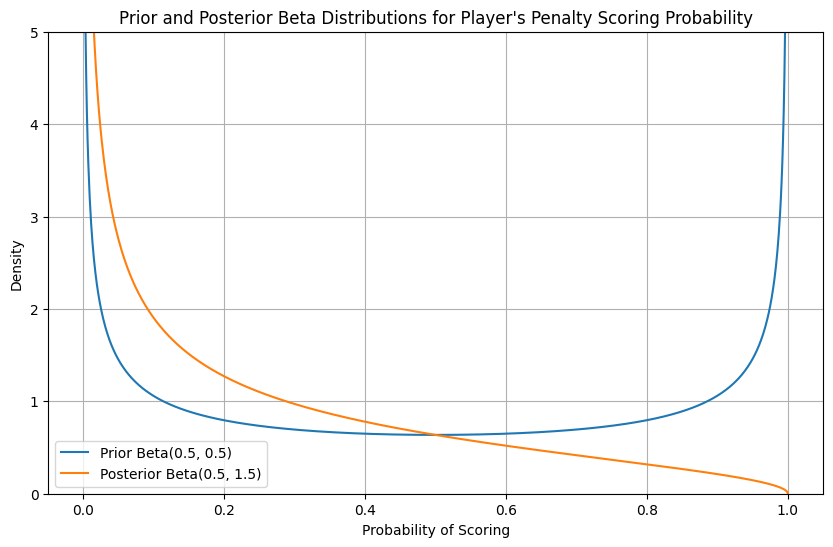

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the prior and posterior beta distributions
alpha_prior = 0.5
beta_prior = 0.5

alpha_posterior = 0.5
beta_posterior = 1.5

# Generate x values (probabilities) from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) for the prior and posterior distributions
pdf_prior = beta.pdf(x, alpha_prior, beta_prior)
pdf_posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_prior, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='#1f77b4')
plt.plot(x, pdf_posterior, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})', color='#ff7f0e')

# Add labels and title
plt.xlabel('Probability of Scoring')
plt.ylabel('Density')
plt.title('Prior and Posterior Beta Distributions for Player\'s Penalty Scoring Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 5) # Limit y-axis to 5


# Show the plot
plt.show()

## What does this tell us?
We began with a **prior distribution**, Beta(0.5,0.5), which suggested that an event's probability was either very high or very low.   
After observing one failure in a single trial (binomial data), we updated our belief.   
The **posterior distribution** shows that the probability shifted toward the lower end of the spectrum, reflecting the new evidence.

If we collect more data and see another failure, then the new posterior can be updated with the previous round’s posterior now being used as the prior.


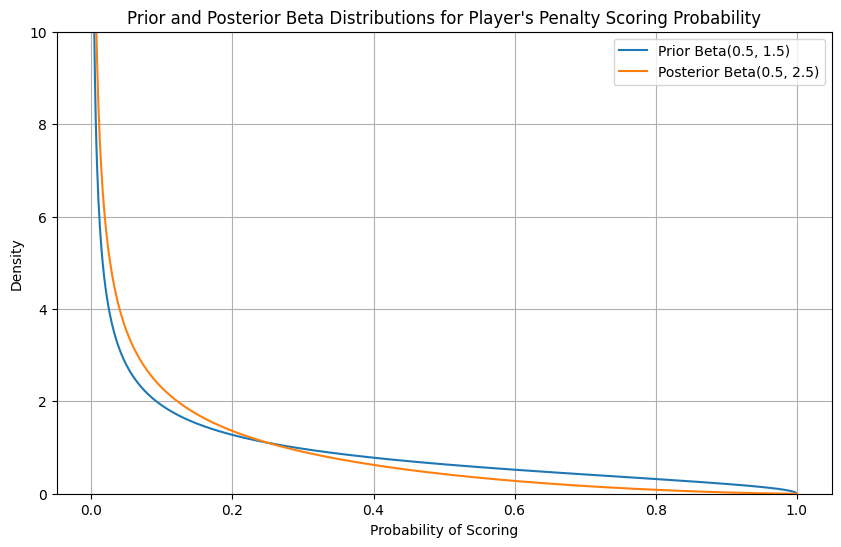

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the prior and posterior beta distributions
alpha_prior = 0.5
beta_prior = 1.5

alpha_posterior = 0.5
beta_posterior = 2.5

# Generate x values (probabilities) from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) for the prior and posterior distributions
pdf_prior = beta.pdf(x, alpha_prior, beta_prior)
pdf_posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_prior, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='#1f77b4')
plt.plot(x, pdf_posterior, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})', color='#ff7f0e')

# Add labels and title
plt.xlabel('Probability of Scoring')
plt.ylabel('Density')
plt.title('Prior and Posterior Beta Distributions for Player\'s Penalty Scoring Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 10)


# Show the plot
plt.show()

Let's say we continue to scout this player as observing just 2 penalty kicks really tells us nothing. Over the course of 2 seasons the player scores 18 penalties out of 20.

**How would our distribution change then?**

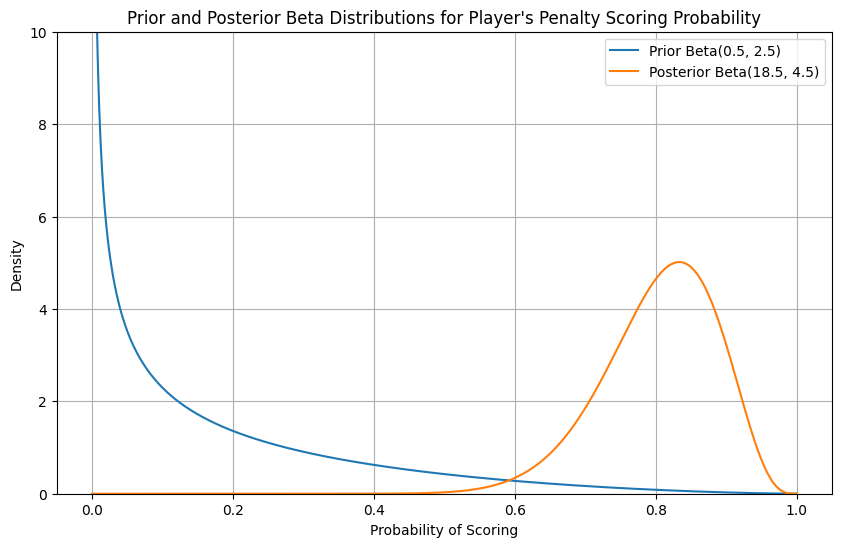

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the parameters for the prior and posterior beta distributions
alpha_prior = 0.5
beta_prior = 2.5

alpha_posterior = 18.5
beta_posterior = 4.5

# Generate x values (probabilities) from 0 to 1
x = np.linspace(0, 1, 1000)

# Calculate the probability density function (PDF) for the prior and posterior distributions
pdf_prior = beta.pdf(x, alpha_prior, beta_prior)
pdf_posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_prior, label=f'Prior Beta({alpha_prior}, {beta_prior})', color='#1f77b4')
plt.plot(x, pdf_posterior, label=f'Posterior Beta({alpha_posterior}, {beta_posterior})', color='#ff7f0e')

# Add labels and title
plt.xlabel('Probability of Scoring')
plt.ylabel('Density')
plt.title('Prior and Posterior Beta Distributions for Player\'s Penalty Scoring Probability')
plt.legend()
plt.grid(True)
plt.ylim(0, 10)


# Show the plot
plt.show()

Here you can see how with more data, the posterior shifts more towards the observation and less towards our prior information.

Intuitively this is what we want! We had very little prior information about this player's abilities and so initially the prior dictated our posterior.

However, as we got more data, we moved away from our non-informative prior and came closer to the true probability.

## Summary
* A beta prior is a special prior distribution that when multiplied with a binomial likelihood function, results in a posterior that follows a beta distribution.
* A beta distribution can be used as a conjugate prior for Bernoulli, binomial, negative binomial and geometric distributions.
* For problems where we cannot use conjugate priors, we need another method to avoid integrating the denominator of Bayes theorem. That method is called MCMC method and we’ll see that later on.

